In [23]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de los gráficos para que se muestren en el notebook
%matplotlib inline
sns.set(style='whitegrid')

In [24]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('myIOTDynamoDB_dev2_data_v3.csv')

# Ordenar los datos por la columna 'time'
df = df.sort_values(by='time')

In [25]:
# Mostrar las primeras filas del DataFrame para una vista inicial
print("Vista inicial de los datos:")
df.head()

Vista inicial de los datos:


,hostname,download_speed,external_temperature,number_of_hosts,cpu_usage,cpu_temp,disk_total,memory_used,upload_speed,memory_total,time,disk_used
0,raspberrypi,39.688,14,4,1.3,52.078,14.292,167.520,5.166,871.664,1729906188,11.472
1,raspberrypi,21.542,13,4,0.3,53.692,14.292,171.715,7.266,871.664,1729906540,11.472
2,raspberrypi,41.997,13,1,6.8,54.230,14.292,175.262,17.243,871.664,1729906912,11.472
3,raspberrypi,39.078,13,3,6.5,55.306,14.292,174.625,4.915,871.664,1729907278,11.472
4,raspberrypi,3.310,13,4,0.5,54.768,14.292,174.164,10.904,871.664,1729907655,11.473


In [26]:
# Resumen general del DataFrame (para ver tipos de datos, valores nulos, etc.)
print("\nResumen del DataFrame:")
df.info()


Resumen del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hostname              1331 non-null   object 
 1   download_speed        1331 non-null   float64
 2   external_temperature  1331 non-null   int64  
 3   number_of_hosts       1331 non-null   int64  
 4   cpu_usage             1331 non-null   float64
 5   cpu_temp              1331 non-null   float64
 6   disk_total            1331 non-null   float64
 7   memory_used           1331 non-null   float64
 8   upload_speed          1331 non-null   float64
 9   memory_total          1331 non-null   float64
 10  time                  1331 non-null   int64  
 11  disk_used             1331 non-null   float64
dtypes: float64(8), int64(3), object(1)
memory usage: 124.9+ KB


In [27]:
# Descripción estadística de las columnas numéricas
print("\nDescripción estadística de las columnas numéricas:")
df.describe()


Descripción estadística de las columnas numéricas:


,download_speed,external_temperature,number_of_hosts,cpu_usage,cpu_temp,disk_total,memory_used,upload_speed,memory_total,time,disk_used
count,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1.331000e+03,1331.000000,1331.000000,1331.000,1.331000e+03,1331.000000
mean,15.059240,15.368144,4.026296,1.945755,49.045232,1.429200e+01,184.664651,7.882477,871.664,1.730435e+09,11.547316
std,9.440573,3.579979,1.046325,2.469751,1.746856,1.777025e-15,3.406393,8.072615,0.000,1.949668e+05,0.039343
min,0.000000,10.000000,1.000000,0.000000,36.476000,1.429200e+01,161.539000,0.000000,871.664,1.729906e+09,11.472000
25%,9.052000,12.000000,3.000000,0.300000,47.774000,1.429200e+01,183.394500,3.448000,871.664,1.730290e+09,11.510000
50%,12.333000,15.000000,4.000000,0.800000,48.312000,1.429200e+01,185.074000,5.151000,871.664,1.730435e+09,11.552000
75%,16.858500,18.000000,5.000000,2.300000,49.388000,1.429200e+01,186.779000,8.141500,871.664,1.730603e+09,11.583500
max,41.997000,23.000000,6.000000,15.500000,55.844000,1.429200e+01,197.375000,35.945000,871.664,1.730754e+09,11.615000


In [28]:
# Verificar si hay valores nulos
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
hostname                0
download_speed          0
external_temperature    0
number_of_hosts         0
cpu_usage               0
cpu_temp                0
disk_total              0
memory_used             0
upload_speed            0
memory_total            0
time                    0
disk_used               0
dtype: int64


In [29]:
#Rellenar valores nulos con la media
# df['nombre_columna'] = df['nombre_columna'].fillna(df['nombre_columna'].mean())

In [30]:
# Verificar si hay duplicados
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0


In [31]:
# Eliminar filas duplicadas
df.drop_duplicates(inplace=True)

In [32]:
# Normalizar los nombres de las columnas (eliminar espacios, poner en minúsculas, etc.)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [33]:
# Verificar la consistencia de valores en una columna 'hostname'
print("\nValores únicos en la columna 'hostname':")
print(df['hostname'].unique())


Valores únicos en la columna 'hostname':
['raspberrypi']


In [34]:
# Filtrar valores inconsistentes o atípicos en una columna numérica 
# Filtrar por rango de valores lógicos (ejemplo: 'cpu_usage' entre 0 y 100)
df = df[(df['cpu_usage'] >= 0) & (df['cpu_usage'] <= 100)]

In [ ]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv('myIOTDynamoDB_dev2_data_v3_clean.csv', index=False)
print("\nDatos limpios guardados en 'myIOTDynamoDB_dev3_data_clean.csv'")



Datos limpios guardados en 'myIOTDynamoDB_dev3_data_clean.csv'


In [36]:
# Mostrar algunas filas del DataFrame limpio
print("\nVista de los datos después de la limpieza:")
df.head()


Vista de los datos después de la limpieza:


,hostname,download_speed,external_temperature,number_of_hosts,cpu_usage,cpu_temp,disk_total,memory_used,upload_speed,memory_total,time,disk_used
0,raspberrypi,39.688,14,4,1.3,52.078,14.292,167.520,5.166,871.664,1729906188,11.472
1,raspberrypi,21.542,13,4,0.3,53.692,14.292,171.715,7.266,871.664,1729906540,11.472
2,raspberrypi,41.997,13,1,6.8,54.230,14.292,175.262,17.243,871.664,1729906912,11.472
3,raspberrypi,39.078,13,3,6.5,55.306,14.292,174.625,4.915,871.664,1729907278,11.472
4,raspberrypi,3.310,13,4,0.5,54.768,14.292,174.164,10.904,871.664,1729907655,11.473


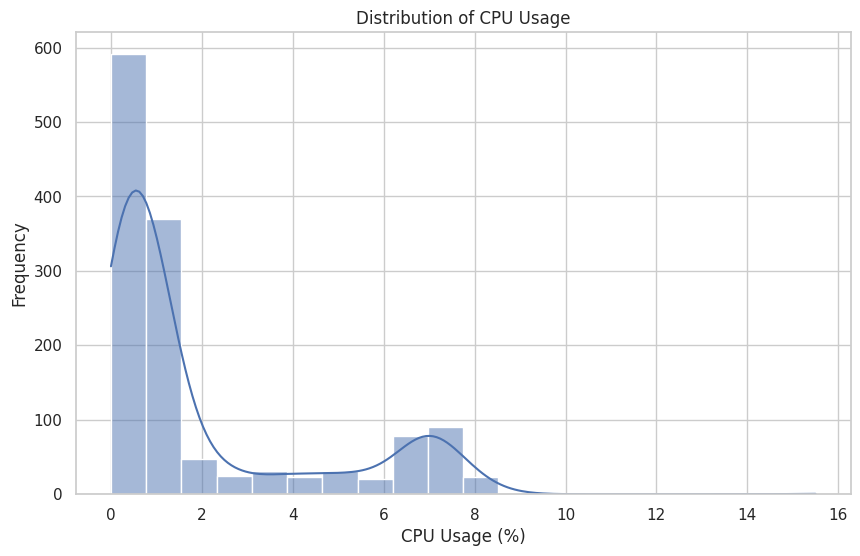

In [37]:
# Distribution plot for a numerical column (e.g., 'cpu_usage')
plt.figure(figsize=(10, 6))
sns.histplot(df['cpu_usage'], bins=20, kde=True)
plt.title('Distribution of CPU Usage')
plt.xlabel('CPU Usage (%)')
plt.ylabel('Frequency')
plt.show()


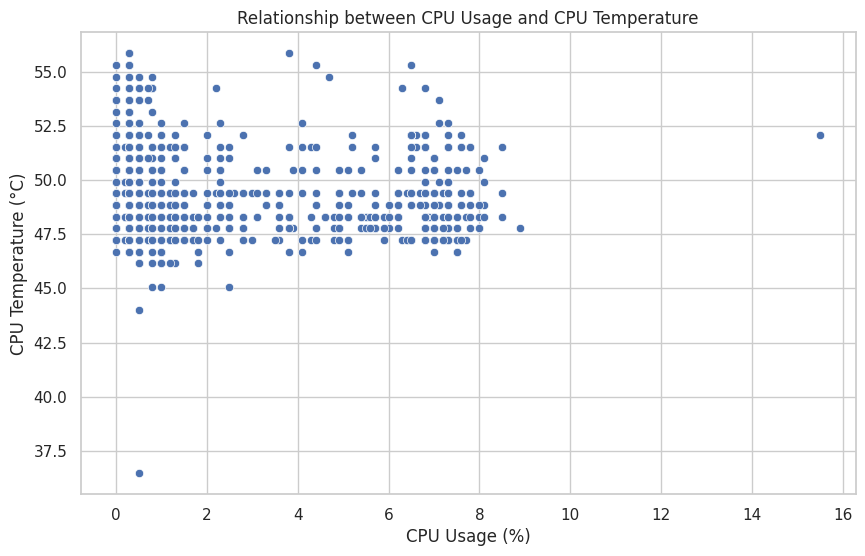

In [38]:
# Scatter plot to analyze the relationship between two variables (e.g., 'cpu_usage' and 'cpu_temp')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cpu_usage', y='cpu_temp')
plt.title('Relationship between CPU Usage and CPU Temperature')
plt.xlabel('CPU Usage (%)')
plt.ylabel('CPU Temperature (°C)')
plt.show()


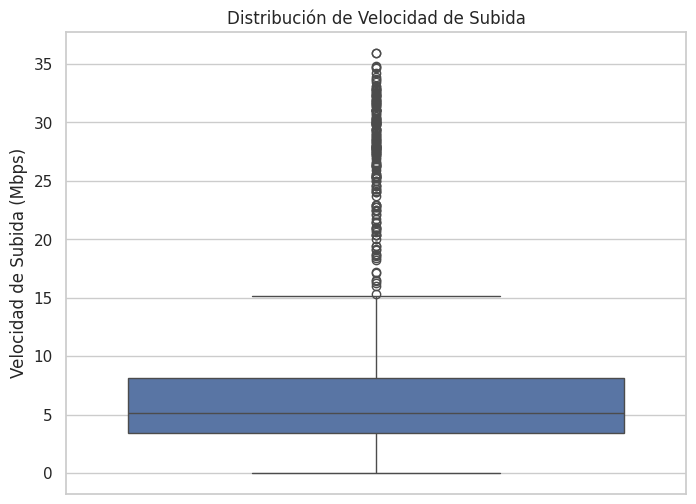

In [39]:
# Gráfico de caja (boxplot) para identificar outliers en una columna (por ejemplo, 'upload_speed')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='upload_speed')
plt.title('Distribución de Velocidad de Subida')
plt.ylabel('Velocidad de Subida (Mbps)')
plt.show()

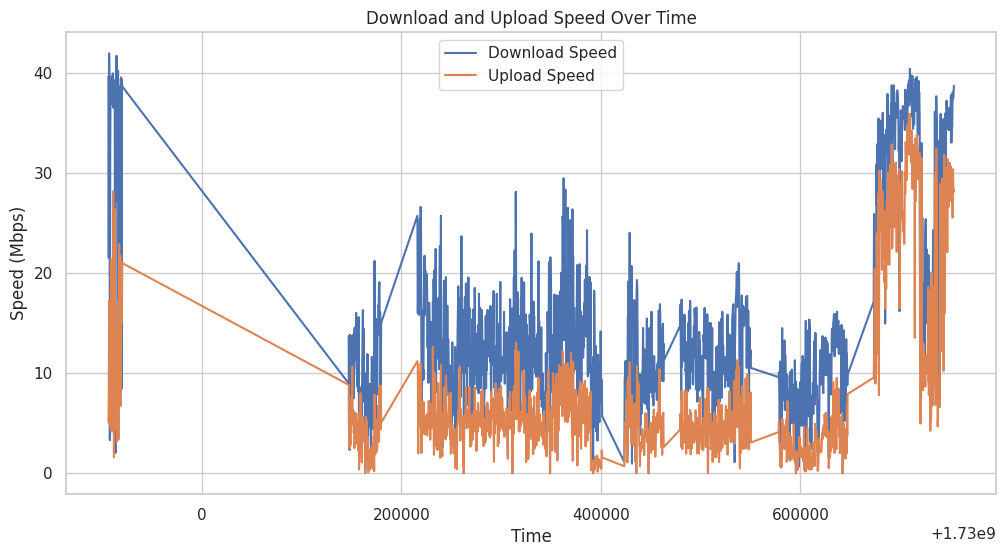

In [40]:
# Line plot to compare multiple metrics over time (e.g., 'download_speed' and 'upload_speed')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='time', y='download_speed', label='Download Speed')
sns.lineplot(data=df, x='time', y='upload_speed', label='Upload Speed')
plt.title('Download and Upload Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Speed (Mbps)')
plt.legend()
plt.show()

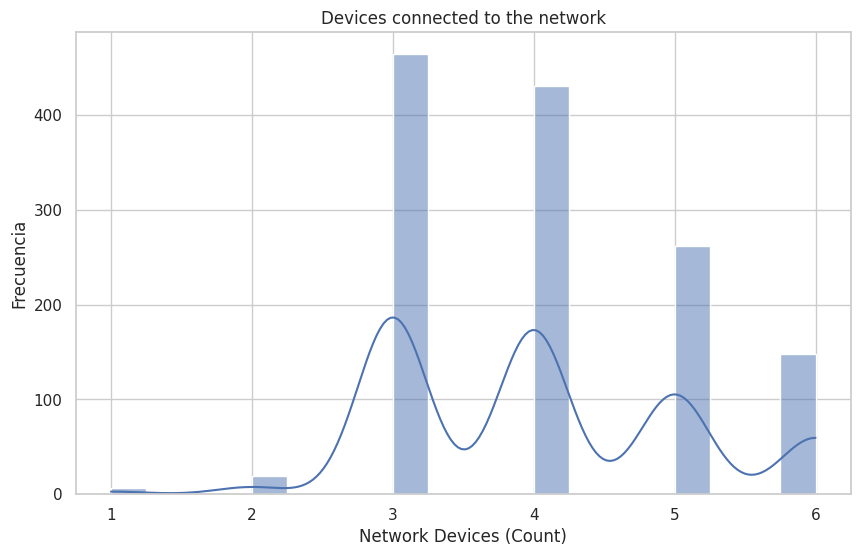

In [41]:
# Gráfico de distribución para una columna numérica (por ejemplo, 'cpu_usage')
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_hosts'], bins=20, kde=True)
plt.title('Devices connected to the network')
plt.xlabel('Network Devices (Count)')
plt.ylabel('Frecuencia')
plt.show()

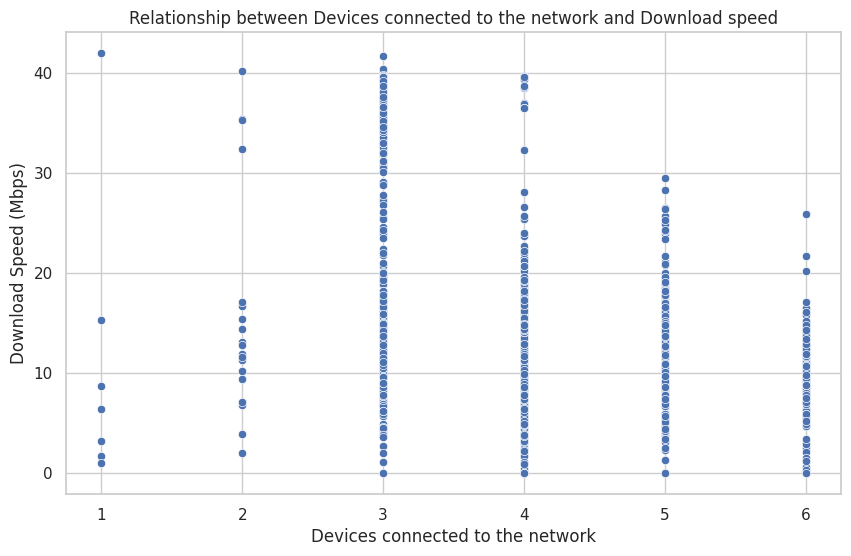

In [56]:
# Scatter plot to analyze the relationship between two variables (e.g., 'cpu_usage' and 'cpu_temp')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='number_of_hosts', y='download_speed')
plt.title('Relationship between Devices connected to the network and Download speed')
plt.xlabel('Devices connected to the network')
plt.ylabel('Download Speed (Mbps)')
plt.show()

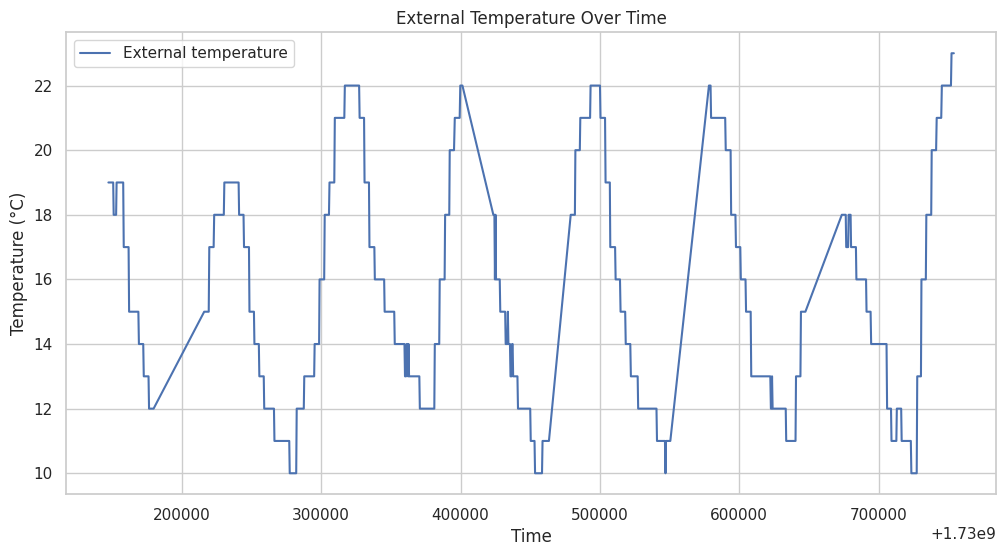

In [ ]:
# Line plot to compare multiple metrics over time 

filtered_df = df[df['time'] > 1730147194]
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='time', y='external_temperature', label='External temperature')
#sns.lineplot(data=df, x='time', y='cpu_temp', label='CPU temperature')
plt.title('External Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()